# Discrete and Continuous Random Variables


A random variable is a variable that takes a value according to chance. Probability distribution is the probability that each value can come out of the random variable.

Random variables can be divided in two different classes:
- Discrete random variable
- Continuous random variable

We can easily see how modeling random variables can come in handy when dealing with finance. Financial assets are often expressed as moving according to deterministic and random patterns. Each random variable follows a probability distribution, a function which describes it. The probability distribution assigns probabilities to all possible values of a random variable. For a given random variable `X`, we express the probability that `X` is equal to a value `x` as `P(X = x)`. For discrete random variables, we can express `p(x) = P(X = x)` in shorthand -> this is known as the `probability mass function` (PMF). For continuous random variables we cannot use a PMF so we must use a `probability density function` (PDF).

Probability distributions form the basis for the Black-Scholes and binomial pricing models as well as the CAPM.

For each probability distribution funcion, we also have a `cumulative distribution function` (CDF). This is defined as `P(X <= x)`.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.stats as stats
from statsmodels.stats import stattools
from __future__ import division

sns.set_theme()

## Discrete Random Variables

A discrete random variable is one with a countable number of outcomes. Each of them has a separate probability associated with it. Consider a coin flip or a die roll: for the coin flip there are two possible outcomes, either heads or tails, each with a `1/2` probability of occurring. Discrete random variables do not always have equal weights for all outcomes. The basic unit of a discrete random variable is its `probability mass function` (PMF), another name for the probability function `p(x)`. The PMF gives a probability to each point in the domain of the probability distribution. A probability function has two main properties:
- $0 \leq p(x) \leq 1$ -> all probabilities are in the interval `[0, 1]`.
- The sum of all probabilities `p(x)` over all values of X is equal to `1`. The total weights for all values of the random variable must add to `1`.

In [2]:
class DiscreteRandomVariable:
    def __init__(self, a=0, b=1):
        self.variableType = ""
        self.low = a
        self.high = b
        return
    
    def draw(self, numberOfSamples):
        samples = np.random.randint(self.low, self.high, numberOfSamples)
        return samples

### Uniform Distribution
The basic type of probability distribution is the uniform distribution. With a discrete uniform distribution, equal weight is assigned to all outcomes. The rolling die has six faces, numbered `1` through `6`, each equally likely to occur with a `1/6` chance each. With this, we know that the PMF must be `p(x) = 1/6` for all values of our uniform random variable `X`.

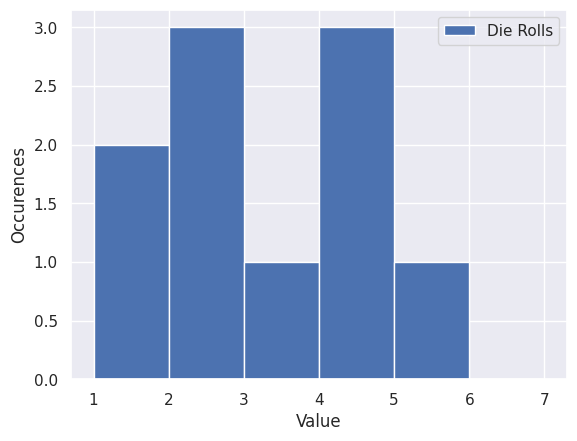

In [3]:
DieRolls = DiscreteRandomVariable(1, 6)
plt.hist(DieRolls.draw(10), bins=[1,2,3,4,5,6,7], align='mid')
plt.xlabel('Value')
plt.ylabel('Occurences')
plt.legend(['Die Rolls']);

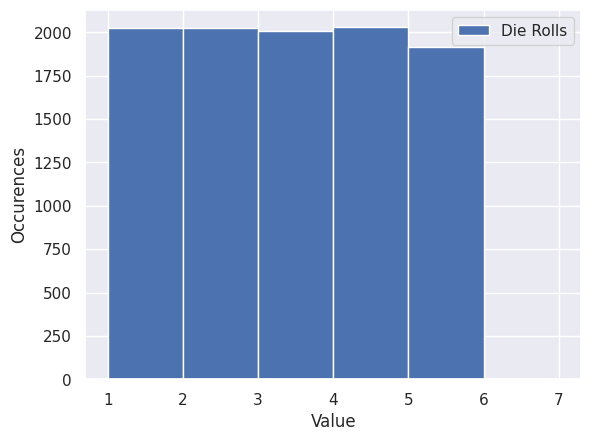

In [4]:
plt.hist(DieRolls.draw(10000), bins=[1,2,3,4,5,6,7], align='mid')
plt.xlabel('Value')
plt.ylabel('Occurences')
plt.legend(['Die Rolls']);

Let's look at the possibilities for all values of both the probability function and the cumulative distribution function:
Value: $X = x$ | PMF: $p(x) = P(X = x)$ | CDF: $F(x) = P(X \leq x)$ | --- | --- | --- | 1 | $1/6$ | $1/6$ 2 | $1/6$ | $1/3$ 3 | $1/6$ | $1/2$ 4 | $1/6$ | $2/3$ 5 | $1/6$ | $5/6$ 6 | $1/6$ | $1$

The probability function satisfies the necessary conditions. 

### Binomial Distribution

A binomial distribution is used to describe successes and failures. This can be very useful in an investment context as many of our choices tend to be binary like this. When we take a single success/failure trial, we call it a Bernoulli trial. With the Bernoulli random variable, we have two possible outcomes:

$p(1) = P(Y = 1) = p$

$p(0) = P(Y = 0) = 1 - p$

We consider `Y` taking a value of `1` to be success, so the probability of a success occurring in a single trial is `p`.

A binomial distribution takes a set of `n` Bernoulli trials. As such, we can have somewhere between `0` and `n` successes. Each trial has the same probability of success `p`, and is independent from the others. A binomial random variable is defined as `X ~ B(n,p)` -> X is a binomial random variable with `n` trials and `p` probability of success.

If we have `6` pairs of socks and we want to choose `2` of them, we would write the total number of combinations possible as $\binom{6}{2}$.

$\binom{6}{2} = \frac{6!}{2! (6-2)!} = \frac{6!}{2! 4!} = 15$

More generally: $\binom{n}{x} = \frac{n!}{(n-x)! \ x!}$


Now, we use this notation to choose successes with the binomial random variable. The combination serves the purpose of computing how many different ways we can reach the same result. The probability functions is therefore: $p(x) = P(X = x) = \binom{n}{x}p^x(1-p)^{n-x} = \frac{n!}{(n-x)! \ x!} p^x(1-p)^{n-x}$

In [5]:
class BinomialRandomVariable(DiscreteRandomVariable):
    def __init__(self, numberOfTrials = 10, probabilityOfSuccess = 0.5):
        self.variableType = "Binomial"
        self.numberOfTrials = numberOfTrials
        self.probabilityOfSuccess = probabilityOfSuccess
        return
    
    def draw(self, numberOfSamples):
        sample = np.random.binomial(self.numberOfTrials, self.probabilityOfSuccess, numberOfSamples)
        return sample

Stock price example: let's say the price will move up or down, each with a probability $p = 0.5$. Let's consider a move up `U` a success, while a move down `D` a failure. We can analyze the probability of each event using a binomial random variable. With $n=5$, we consider 5 observations. 

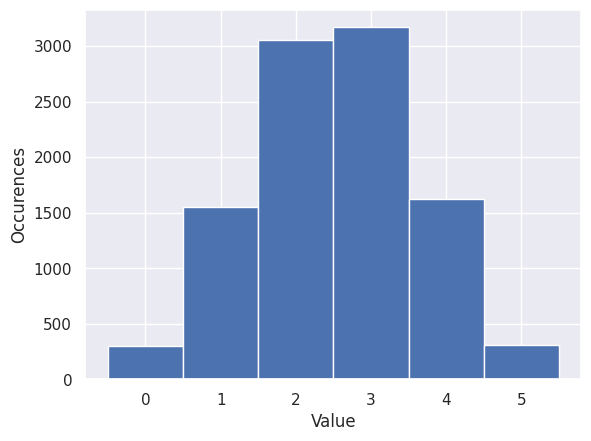

In [6]:
StockProbabilities = BinomialRandomVariable(5, 0.5)
plt.hist(StockProbabilities.draw(10000), bins=[0,1,2,3,4,5,6], align='left')
plt.xlabel('Value')
plt.ylabel('Occurences');

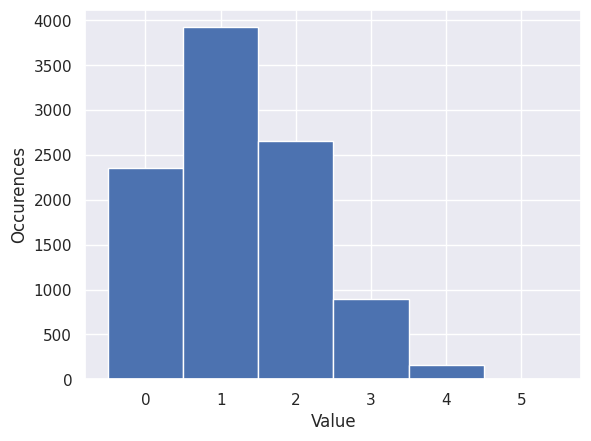

In [7]:
StockProbabilities = BinomialRandomVariable(5, 0.25)
plt.hist(StockProbabilities.draw(10000), bins=[0,1,2,3,4,5,6], align='left')
plt.xlabel('Value')
plt.ylabel('Occurences');

Changing the value of $p$ from $0.50$ to $0.25$ makes the distribution asymmetric. We can extend this idea of stock price moving with a binomial random variable into a framework called Binomial Model of Stock Price Movement, used as a foundation for option pricing.

## Continuous Random Variables

Continuous random variables differ from discrete random variables in that continuous ones can take infinitely many outcomes. They cannot be counted or described as a list.

We can resolve this issue by taking probabilities across ranges of outcomes. With a continuous random variable $P(X = 0)$ is meaningless. Instead, we woold look for something more like $P(-1 < X < 1)$. For continuous random variables we define a probability density function (PDF), $f_X(x)$ such that we can say:

$P(a < X < b) = \int_a^b f_X(x)dx$